In [1]:
import numpy as np         # For creating matrices and for number operations
import pandas as pd        # For manipulating and reading data
import matplotlib.pyplot as plt      # for ploting graphs
import seaborn as sns      # To plot heatmaps

In [2]:
df = pd.read_csv("../Data/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

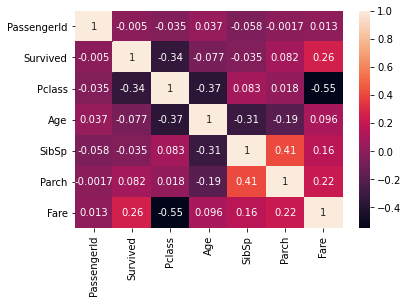

In [4]:
sns.heatmap(df.corr() , annot = True)

In [5]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
test = pd.read_csv("../Data/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
df.isna().sum() , len(df)

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 891)

In [9]:
test.isna().sum() , len(test)

(PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64,
 418)

In [10]:
df.drop(["Cabin"] , axis = 1 , inplace = True)
test.drop(["Cabin"] , axis = 1 , inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [12]:
df.drop(["PassengerId" , "Name"] , axis = 1 , inplace = True)
ids = test["PassengerId"]
test.drop(["PassengerId" , "Name"] , axis = 1 , inplace = True)

In [13]:
cats = df.select_dtypes(include="object").columns
cats

Index(['Sex', 'Ticket', 'Embarked'], dtype='object')

In [14]:
ints = df.select_dtypes(exclude="object").columns
ints

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [15]:
for i in df.columns:
    print(f"The number of unique values in {i} column is/are {len(df[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are {df[i].unique()}")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
    print("\n\n")
    print("*"*100)
    print("\n\n")

The number of unique values in Survived column is/are 2


The unique values in Survived column is/are [0 1]


The value counts for each value in Survived column is/are :  
0    549
1    342
Name: Survived, dtype: int64



****************************************************************************************************



The number of unique values in Pclass column is/are 3


The unique values in Pclass column is/are [3 1 2]


The value counts for each value in Pclass column is/are :  
3    491
1    216
2    184
Name: Pclass, dtype: int64



****************************************************************************************************



The number of unique values in Sex column is/are 2


The unique values in Sex column is/are ['male' 'female']


The value counts for each value in Sex column is/are :  
male      577
female    314
Name: Sex, dtype: int64



****************************************************************************************************



The number of uni

In [16]:
def grouping(df):
    for title in df.columns:
        res = df["Survived"].groupby(df[title]).mean()
        print(f"Comparision of {title} with Survival rate is ")
        print(res)
        print("\n")

grouping(df) 

Comparision of Survived with Survival rate is 
Survived
0    0
1    1
Name: Survived, dtype: int64


Comparision of Pclass with Survival rate is 
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


Comparision of Sex with Survival rate is 
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Comparision of Age with Survival rate is 
Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64


Comparision of SibSp with Survival rate is 
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


Comparision of Parch with Survival rate is 
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


Comparision of Ticket with Survival rate is 
Ticket
110152 

In [17]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
df["Embarked"].fillna("S" , inplace = True)
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
len(df["Ticket"].unique()) , df["Ticket"].value_counts()

(681,
 CA. 2343            7
 347082              7
 1601                7
 347088              6
 3101295             6
                    ..
 C.A./SOTON 34068    1
 113784              1
 A/5 3902            1
 347064              1
 STON/O2. 3101290    1
 Name: Ticket, Length: 681, dtype: int64)

In [20]:
df.drop(["Ticket"] , axis = 1 , inplace = True)
test.drop(["Ticket"] , axis = 1 , inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [22]:
test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [23]:
test["Age"].fillna(df["Age"].median() , inplace = True)
test["Fare"].fillna(df["Fare"].median() , inplace = True)

In [24]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [25]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X = df.drop(["Survived"] , axis = 1)
y = df["Survived"]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.1 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(801, 90, 801, 90)

In [27]:
median = X_train["Age"].median()
X_train["Age"].fillna(median , inplace = True)
X_test["Age"].fillna(median , inplace = True)

C:\Users\DINESHREDDY\Desktop\sample_project\env\lib\site-packages\pandas\core\series.py:4433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[["Age" , "Fare"]] = scaler.fit_transform(X_train[["Age" , "Fare"]])
X_test[["Age" , "Fare"]] = scaler.transform(X_test[["Age" , "Fare"]])
test[["Age" , "Fare"]] = scaler.transform(test[["Age" , "Fare"]])

<ipython-input-28-016e06b4e165>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[["Age" , "Fare"]] = scaler.fit_transform(X_train[["Age" , "Fare"]])
C:\Users\DINESHREDDY\Desktop\sample_project\env\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-28-016e06b4e165>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [29]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
165,3,male,-1.562035,0,2,-0.230819,S
541,3,female,-1.562035,4,2,-0.016846,S
625,1,male,2.420289,0,0,0.003970,S
388,3,male,-0.106955,0,0,-0.485514,Q
76,3,male,-0.106955,0,0,-0.482198,S


In [30]:
from sklearn.preprocessing import LabelEncoder
lb1 = LabelEncoder()
X_train["Sex"] = lb1.fit_transform(X_train["Sex"])
X_test["Sex"] = lb1.transform(X_test["Sex"])

<ipython-input-30-82b5603899ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Sex"] = lb1.fit_transform(X_train["Sex"])
<ipython-input-30-82b5603899ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Sex"] = lb1.transform(X_test["Sex"])


In [31]:
test["Sex"] = lb1.transform(test["Sex"])

In [32]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
165,3,1,-1.562035,0,2,-0.230819,S
541,3,0,-1.562035,4,2,-0.016846,S
625,1,1,2.420289,0,0,0.003970,S
388,3,1,-0.106955,0,0,-0.485514,Q
76,3,1,-0.106955,0,0,-0.482198,S


In [33]:
X_train = pd.get_dummies(X_train , columns = ["Pclass" , "Embarked"] , prefix = ["Pclass" , "Embarked"])
X_test = pd.get_dummies(X_test , columns = ["Pclass" , "Embarked"] , prefix = ["Pclass" , "Embarked"])
test = pd.get_dummies(test , columns = ["Pclass" , "Embarked"] , prefix = ["Pclass" , "Embarked"])

In [34]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
165,1,-1.562035,0,2,-0.230819,0,0,1,0,0,1
541,0,-1.562035,4,2,-0.016846,0,0,1,0,0,1
625,1,2.420289,0,0,0.003970,1,0,0,0,0,1
388,1,-0.106955,0,0,-0.485514,0,0,1,0,1,0
76,1,-0.106955,0,0,-0.482198,0,0,1,0,0,1


In [35]:
X_train.drop(["Pclass_1" , "Embarked_C"] , axis = 1 , inplace = True)
X_test.drop(["Pclass_1" , "Embarked_C"] , axis = 1 , inplace = True)
test.drop(["Pclass_1" , "Embarked_C"] , axis = 1 , inplace = True)

In [36]:
test.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0.390835,0,0,-0.483523,0,1,1,0
1,0,1.348124,1,0,-0.500028,0,1,0,1
2,1,2.496872,0,0,-0.446535,1,0,1,0
3,1,-0.183539,0,0,-0.466937,0,1,0,1
4,0,-0.566454,1,1,-0.394783,0,1,0,1


In [37]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import classification_report , f1_score , confusion_matrix

In [38]:
xgb = XGBClassifier()
random = RandomForestClassifier(random_state = 42)
linear = LogisticRegression()
neighbor = KNeighborsClassifier()
svm = svm.SVC()

In [39]:
xgb.fit(X_train , y_train)
random.fit(X_train , y_train)
linear.fit(X_train , y_train)
neighbor.fit(X_train , y_train)
svm.fit(X_train , y_train)

C:\Users\DINESHREDDY\Desktop\sample_project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:57:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


SVC()

In [40]:
print(xgb.score(X_train , y_train))
print(random.score(X_train , y_train))
print(linear.score(X_train , y_train))
print(neighbor.score(X_train , y_train))
print(svm.score(X_train , y_train))

0.9588014981273408
0.9775280898876404
0.8002496878901373
0.8564294631710362
0.8339575530586767


C:\Users\DINESHREDDY\Desktop\sample_project\env\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [41]:
xgb_preds = xgb.predict(X_test)
random_preds = random.predict(X_test)
linear_preds = linear.predict(X_test)
neighbor_preds = neighbor.predict(X_test)
svm_preds = svm.predict(X_test)

C:\Users\DINESHREDDY\Desktop\sample_project\env\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [42]:
def metrics(y_test , preds):
    print(f1_score(y_test , preds))
    print(confusion_matrix(y_test , preds))

print("Xgb")
metrics(y_test , xgb_preds)
print("\n")
    
    
print("Random")
metrics(y_test , random_preds)
print("\n")

print("Linear")
metrics(y_test , linear_preds)
print("\n")

print("Neighbors")
metrics(y_test , neighbor_preds)
print("\n")

print("Svm")
metrics(y_test , svm_preds)
print("\n")

Xgb
0.8157894736842106
[[45  9]
 [ 5 31]]


Random
0.8
[[45  9]
 [ 6 30]]


Linear
0.8108108108108109
[[46  8]
 [ 6 30]]


Neighbors
0.8378378378378377
[[47  7]
 [ 5 31]]


Svm
0.7945205479452055
[[46  8]
 [ 7 29]]




In [43]:
grid_random = {"n_estimators" : [100 , 120 , 150 , 175 , 200 , 500],
              "bootstrap" : [True , False] , 
              "max_features" : ['auto', 'sqrt'] , 
              "min_samples_leaf" : [1, 2, 4] , 
              "class_weight" : ["balanced", "balanced_subsample"] , 
              "random_state" : [42]}

grid_linear = {"max_iter" : [100 , 150 , 200 , 250 , 500] , 
              "solver" : ["liblinear"] , 
              "multi_class" : ["ovr"] , 
              "random_state" : [42]}

grid_neighbor = {"n_neighbors" : [3 , 5 , 7 , 10] , 
                "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]} 

In [44]:
from sklearn.model_selection import GridSearchCV

model_random = GridSearchCV(RandomForestClassifier() , param_grid = grid_random, cv = 5, verbose=2)
model_linear = GridSearchCV(LogisticRegression() , param_grid = grid_linear, cv = 5, verbose=2)
model_neighbor = GridSearchCV(KNeighborsClassifier() , param_grid = grid_neighbor, cv = 5, verbose=2)

In [45]:
model_linear.fit(X_train , y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] max_iter=100, multi_class=ovr, random_state=42, solver=liblinear 
[CV]  max_iter=100, multi_class=ovr, random_state=42, solver=liblinear, total=   0.0s
[CV] max_iter=100, multi_class=ovr, random_state=42, solver=liblinear 
[CV]  max_iter=100, multi_class=ovr, random_state=42, solver=liblinear, total=   0.0s
[CV] max_iter=100, multi_class=ovr, random_state=42, solver=liblinear 
[CV]  max_iter=100, multi_class=ovr, random_state=42, solver=liblinear, total=   0.0s
[CV] max_iter=100, multi_class=ovr, random_state=42, solver=liblinear 
[CV]  max_iter=100, multi_class=ovr, random_state=42, solver=liblinear, total=   0.0s
[CV] max_iter=100, multi_class=ovr, random_state=42, solver=liblinear 
[CV]  max_iter=100, multi_class=ovr, random_state=42, solver=liblinear, total=   0.0s
[CV] max_iter=150, multi_class=ovr, random_state=42, solver=liblinear 
[CV]  max_iter=150, multi_class=ovr, random_state=42, solver=liblinear, total=   0.0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 150, 200, 250, 500],
                         'multi_class': ['ovr'], 'random_state': [42],
                         'solver': ['liblinear']},
             verbose=2)

In [46]:
model_random.fit(X_train , y_train)
model_random.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=100, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=100, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=100, random_state=42 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=100, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=100, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=100, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=100, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=100, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=100, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=100, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=120, random_state=

[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=120, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=120, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=120, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=120, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=120, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=120, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=120, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=120, random_state=

[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=120, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=150, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=150, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=150, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=150, random_state=

[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=150, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=150, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=175, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=175, random_state=42, total=   0.3s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=175, random_state=

[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=175, random_state=42, total=   0.3s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=175, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=175, random_state=42, total=   0.3s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=175, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=175, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=175, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=175, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=175, random_state=

[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=175, random_state=42, total=   0.3s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=175, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=175, random_state=42, total=   0.3s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=

[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_s

[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_s

[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=200, random_state=42, total=   0.5s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=200, random_state=42, total=   0.5s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=500, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=500, random_state=42, total=   1.0s
[CV] bootstrap=True, class_weight=balanced_s

[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=500, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=500, random_state=42, total=   1.0s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=500, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=500, random_state=42, total=   0.9s
[CV] bootstrap=True, class_weight=balanced_s

[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=500, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=500, random_state=42, total=   0.9s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=500, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=500, random_state=42, total=   0.9s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=500, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=500, random_state=42, total=   0.9s
[CV] bootstrap=True, class_weight=balanced_s

[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=500, random_state=42, total=   1.0s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=500, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=500, random_state=42, total=   0.9s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=500, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=500, random_state=42, total=   0.9s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=500, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=500, random_state=42, total=   0.9s
[CV] bootstrap=True, class_weight=balanced_s

[CV]  bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=500, random_state=42, total=   0.7s
[CV] bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=500, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=500, random_state=42, total=   0.8s
[CV] bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=100, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=100, random_state=42, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=100, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=100, random_state=42, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=100, rando

[CV]  bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=100, random_state=42, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=100, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=100, random_state=42, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=100, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=100, random_state=42, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=100, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=100, random_state=42, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=120, rando

[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=120, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=120, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=120, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=120, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=120, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=120, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=120, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=120, rando

[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=120, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=150, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=150, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=150, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=150, rando

[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=150, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=150, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=175, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=175, rando

[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=175, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=175, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=175, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=ba

[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=175, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=175, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=ba

[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=175, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=175, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=ba

[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=175, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=175, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=175, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=200, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=False, class_weight=ba

[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=200, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=200, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=ba

[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=ba

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  4.1min finished


{'bootstrap': True,
 'class_weight': 'balanced_subsample',
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 100,
 'random_state': 42}

In [47]:
print(model_linear.best_params_)
print(linear.score(X_test , y_test))
print(model_linear.score(X_test , y_test))

{'max_iter': 100, 'multi_class': 'ovr', 'random_state': 42, 'solver': 'liblinear'}
0.8444444444444444
0.8555555555555555


In [48]:
model_neighbor.fit(X_train , y_train)
model_neighbor.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] algorithm=auto, n_neighbors=3 ...................................
[CV] .................... algorithm=auto, n_neighbors=3, total=   0.0s
[CV] algorithm=auto, n_neighbors=3 ...................................
[CV] .................... algorithm=auto, n_neighbors=3, total=   0.0s
[CV] algorithm=auto, n_neighbors=3 ...................................
[CV] .................... algorithm=auto, n_neighbors=3, total=   0.0s
[CV] algorithm=auto, n_neighbors=3 ...................................
[CV] .................... algorithm=auto, n_neighbors=3, total=   0.0s
[CV] algorithm=auto, n_neighbors=3 ...................................
[CV] .................... algorithm=auto, n_neighbors=3, total=   0.0s
[CV] algorithm=auto, n_neighbors=5 ...................................
[CV] .................... algorithm=auto, n_neighbors=5, total=   0.0s
[CV] algorithm=auto, n_neighbors=5 ...................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................... algorithm=auto, n_neighbors=7, total=   0.0s
[CV] algorithm=auto, n_neighbors=7 ...................................
[CV] .................... algorithm=auto, n_neighbors=7, total=   0.0s
[CV] algorithm=auto, n_neighbors=7 ...................................
[CV] .................... algorithm=auto, n_neighbors=7, total=   0.0s
[CV] algorithm=auto, n_neighbors=10 ..................................
[CV] ................... algorithm=auto, n_neighbors=10, total=   0.0s
[CV] algorithm=auto, n_neighbors=10 ..................................
[CV] ................... algorithm=auto, n_neighbors=10, total=   0.0s
[CV] algorithm=auto, n_neighbors=10 ..................................
[CV] ................... algorithm=auto, n_neighbors=10, total=   0.0s
[CV] algorithm=auto, n_neighbors=10 ..................................
[CV] ................... algorithm=auto, n_neighbors=10, total=   0.0s
[CV] algorithm=auto, n_neighbors=10 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.9s finished


{'algorithm': 'auto', 'n_neighbors': 10}

In [49]:
xgb_grid = {"n_estimators" : [200],
            "random_state" : [42],
            "bootstrap" : [True , False] , 
            "max_features" : ['auto', 'sqrt'] , 
            "min_samples_leaf" : [1, 2, 4] , 
            "class_weight" : ["balanced", "balanced_subsample"]}

In [50]:
model_xgb = GridSearchCV(XGBClassifier() , param_grid = xgb_grid, cv = 5, verbose=2)

In [51]:
model_xgb.fit(X_train , y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=200, random_state=42 
[22:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "class_weight", "max_features", "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\DINESHREDDY\Desktop\sample_project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\DINESHREDDY\Desktop\sample_project\env\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=200, random_state=42 
[22:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "class_weight", "max_features", "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior

[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=200, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=200, random_state=42 
[22:01:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "class_weight", "max_features", "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:01:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior

[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=200, random_state=42 
[22:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "class_weight", "max_features", "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior

[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42 
[22:01:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "class_weight", "max_features", "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:01:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior

[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=200, random_state=42 
[22:01:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "class_weight", "max_features", "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:01:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to rest

[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=200, random_state=42 
[22:01:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "class_weight", "max_features", "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:01:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to rest

[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42 
[22:01:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "class_weight", "max_features", "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:01:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to rest

[CV]  bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=200, random_state=42 
[22:01:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "class_weight", "max_features", "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:01:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavi

[CV]  bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=200, random_state=42 
[22:01:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "class_weight", "max_features", "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:01:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavi

[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=200, random_state=42 
[22:01:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "class_weight", "max_features", "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:01:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavi

[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=200, random_state=42 
[22:01:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "class_weight", "max_features", "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:01:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to re

[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=200, random_state=42 
[22:02:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "class_weight", "max_features", "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:02:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to re

[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=200, random_state=42 
[22:02:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "class_weight", "max_features", "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:02:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to re

[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42 
[22:02:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "class_weight", "max_features", "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:02:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to re

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   36.6s finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [52]:
model_xgb.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 200,
 'random_state': 42}

In [53]:
final_xgb_preds = model_xgb.predict(X_test)
final_random_preds = model_random.predict(X_test)
final_linear_preds = model_linear.predict(X_test)
final_neighbor_preds = model_neighbor.predict(X_test)

In [54]:
print("XGB")
metrics(y_test , final_xgb_preds)
print("\n")

print("Random")
metrics(y_test , final_random_preds)
print("\n")

print("Linear")
metrics(y_test , final_linear_preds)
print("\n")

print("Neighbors")
metrics(y_test , final_neighbor_preds)
print("\n")

XGB
0.7999999999999999
[[42 12]
 [ 4 32]]


Random
0.7894736842105262
[[44 10]
 [ 6 30]]


Linear
0.8219178082191781
[[47  7]
 [ 6 30]]


Neighbors
0.7692307692307692
[[50  4]
 [11 25]]




In [55]:
xgb = XGBClassifier(n_estimators = 200 , bootstrap = True,class_weight = 'balanced',max_features = 'auto',min_samples_leaf = 1)
xgb.fit(X_train , y_train)

[22:02:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "class_weight", "max_features", "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:02:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\DINESHREDDY\Desktop\sample_project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=True,
              class_weight='balanced', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, max_features='auto',
              min_child_weight=1, min_samples_leaf=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<BarContainer object of 9 artists>

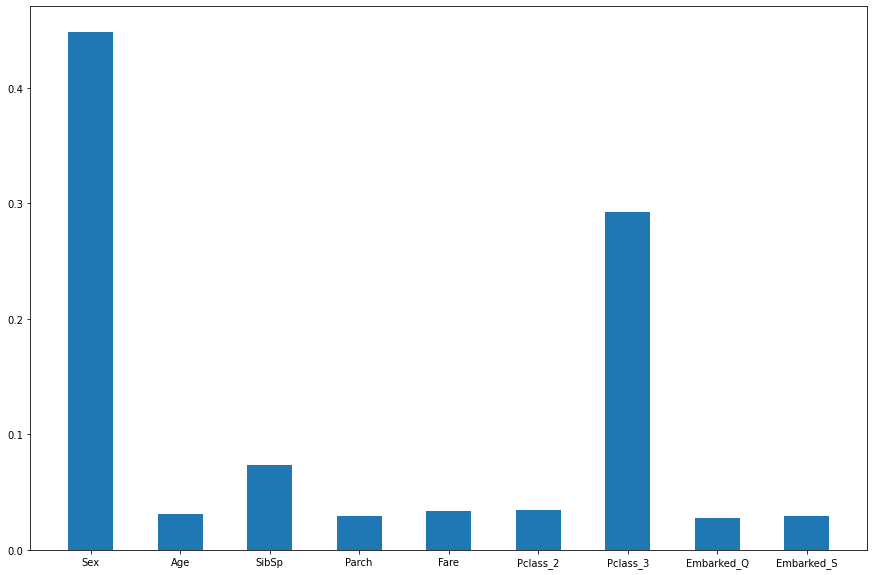

In [56]:
fig , ax = plt.subplots(figsize = (15 , 10))
plt.bar(X_train.columns.tolist(), xgb.feature_importances_ , width = 0.5)

In [57]:
xgb.feature_importances_

array([0.44836608, 0.03115835, 0.07384759, 0.0292392 , 0.03393331,
       0.03427594, 0.29259098, 0.02724777, 0.0293408 ], dtype=float32)

In [58]:
X_train.columns.tolist()

['Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Pclass_2',
 'Pclass_3',
 'Embarked_Q',
 'Embarked_S']

In [59]:
preds = xgb.predict(X_test)
print(f1_score(y_test , preds))
print(confusion_matrix(y_test , preds))
print(classification_report(y_test , preds))

0.7999999999999999
[[42 12]
 [ 4 32]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        54
           1       0.73      0.89      0.80        36

    accuracy                           0.82        90
   macro avg       0.82      0.83      0.82        90
weighted avg       0.84      0.82      0.82        90



C:\Users\DINESHREDDY\Desktop\sample_project\env\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [60]:
linear = LogisticRegression(max_iter = 100,  multi_class = 'ovr',  random_state = 42,  solver = 'liblinear')
linear.fit(X_train , y_train)

LogisticRegression(multi_class='ovr', random_state=42, solver='liblinear')

In [61]:
linear.coef_

array([[-2.48028953, -0.3726183 , -0.30223954, -0.07383272,  0.192503  ,
        -0.49406254, -1.66166604, -0.04703438, -0.33419432]])

<BarContainer object of 9 artists>

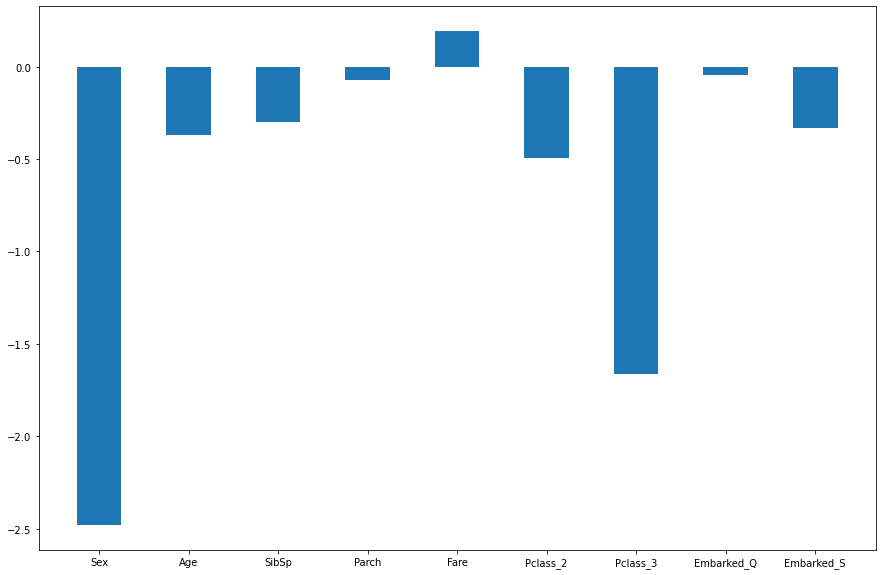

In [62]:
fig , ax = plt.subplots(figsize = (15 , 10))
plt.bar(X_train.columns.tolist(), linear.coef_.ravel() , width = 0.5)

In [63]:
preds = linear.predict(X_test)
print(f1_score(y_test , preds))
print(confusion_matrix(y_test , preds))
print(classification_report(y_test , preds))

0.8219178082191781
[[47  7]
 [ 6 30]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        54
           1       0.81      0.83      0.82        36

    accuracy                           0.86        90
   macro avg       0.85      0.85      0.85        90
weighted avg       0.86      0.86      0.86        90



In [64]:
test

,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0.390835,0,0,-0.483523,0,1,1,0
1,0,1.348124,1,0,-0.500028,0,1,0,1
2,1,2.496872,0,0,-0.446535,1,0,1,0
3,1,-0.183539,0,0,-0.466937,0,1,0,1
4,0,-0.566454,1,1,-0.394783,0,1,0,1
...,...,...,...,...,...,...,...,...,...
413,1,-0.106955,0,0,-0.479128,0,1,0,1
414,0,0.735459,0,0,1.528241,0,0,0,0
415,1,0.697168,0,0,-0.495052,0,1,0,1
416,1,-0.106955,0,0,-0.479128,0,1,0,1


In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         418 non-null    int32  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Pclass_2    418 non-null    uint8  
 6   Pclass_3    418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int32(1), int64(2), uint8(4)
memory usage: 16.5 KB


In [66]:
test.isna().sum()

Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_2      0
Pclass_3      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [67]:
test_preds = linear.predict(test)
test_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [68]:
data = {"PassengerId" : ids , 
       "Survived" : test_preds}

In [69]:
final = pd.DataFrame(data , columns = ["PassengerId" , "Survived"])
final.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
